<a href="https://colab.research.google.com/github/reedikpoopuu/tinyML/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower.

We start by setting up the problem for you.

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


We then definte some of the model for you but leave most of it for you to fill in!

*A hint: your model may want to learn some high level features and then classify them.*

In [5]:
FIRST_LAYER = tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3))
HIDDEN_LAYER_TYPE_1 = tf.keras.layers.MaxPooling2D(2,2)
HIDDEN_LAYER_TYPE_2 = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_3 = tf.keras.layers.MaxPooling2D(2,2)
HIDDEN_LAYER_TYPE_4 = tf.keras.layers.Flatten()
HIDDEN_LAYER_TYPE_5 = tf.keras.layers.Dense(20, activation='relu')
LAST_LAYER = tf.keras.layers.Dense(10, activation='softmax')

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1748 - loss: 2.2018 - val_accuracy: 0.3180 - val_loss: 1.8855
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3654 - loss: 1.7690 - val_accuracy: 0.4145 - val_loss: 1.6374
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4480 - loss: 1.5405 - val_accuracy: 0.4427 - val_loss: 1.5440
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4951 - loss: 1.4150 - val_accuracy: 0.5030 - val_loss: 1.3872
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5326 - loss: 1.3225 - val_accuracy: 0.5217 - val_loss: 1.3816
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5634 - loss: 1.2510 - val_accuracy: 0.5530 - val_loss: 1.2617
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5836 - loss: 1.1923 - val_accuracy: 0.5837 - val_loss: 1.1769
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6070 - loss: 1.1274

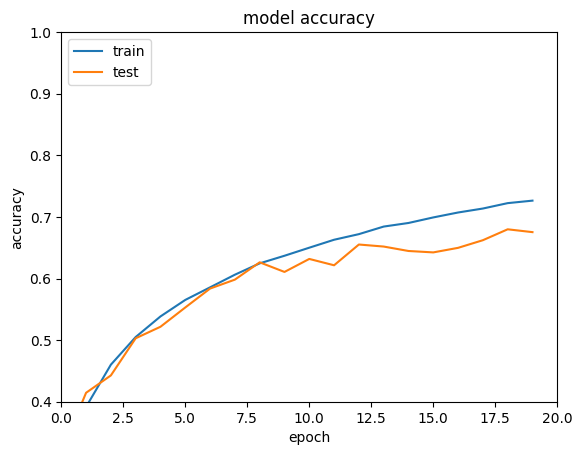

In [6]:
LOSS = 'sparse_categorical_crossentropy'
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

# Compile the model
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6921 - loss: 0.8858 - val_accuracy: 0.6753 - val_loss: 0.9540
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7224 - loss: 0.8058 - val_accuracy: 0.6671 - val_loss: 0.9586
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7396 - loss: 0.7459 - val_accuracy: 0.6811 - val_loss: 0.9445
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7605 - loss: 0.6921 - val_accuracy: 0.6774 - val_loss: 0.9568
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7749 - loss: 0.6441 - val_accuracy: 0.6876 - val_loss: 0.9596
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7880 - loss: 0.6068 - val_accuracy: 0.6699 - val_loss: 1.0239
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8032 - loss: 0.5654 - val_accuracy: 0.6875 - val_loss: 0.9875
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8131 - loss: 0.5319

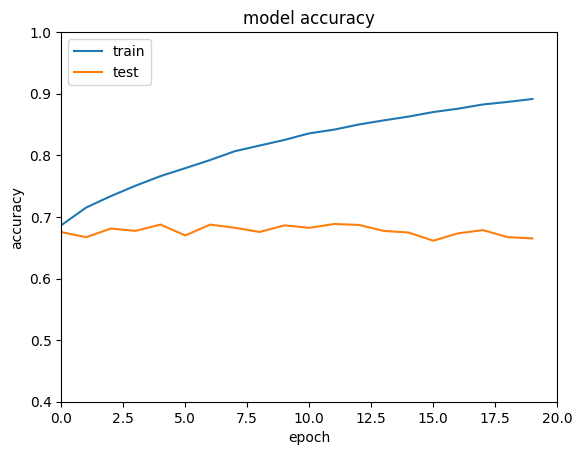

In [7]:
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()